# ABOUT DATASET
This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL) updated 2024.

# BUSINESS PROBLEM

As electric vehicle (EV) adoption increases in Washington State, policymakers, utility providers, and automakers need data-driven insights to support infrastructure planning, incentive programs and customer outreach. However, understanding where and how EVs are being adopted—by city, model, year, and utility provider is fragmented.

## Key Problem:
How can stakeholders identify trends, disparities, and opportunities in EV adoption across geographic and demographic regions in Washington State to optimize resource allocation and policy development?

# BUSINESS OBJECTIVES

### Adoption Trend Analysis: 
Identify trends in EV adoption over time, by make, model, and model year.

### Geographic Distribution:
Analyze EV ownership density by county, city, and legislative district.

### Infrastructure Planning:
Identify areas with high EV population but limited utility coverage or support for EV infrastructure.

### Incentive Effectiveness:
Evaluate the correlation between CAFV eligibility and EV adoption.

### Equity Assessment:
Compare EV adoption across different 2020 census tracts to uncover demographic or economic disparities.

# PROPOSED METHODOLOGY
1. ### Data Cleaning and Preprocessing
Handle missing values

Parse and standardize geographical coordinates and utilities

Convert categorical fields (e.g., Make, Model, CAFV Eligibility) to appropriate formats

2. ### Exploratory Data Analysis (EDA)
Temporal trends (Model Year vs Count)

Geospatial mapping of EV ownership (using coordinates, county, city)

Popular makes/models and their distribution

EV range and MSRP trends over years

3. ### Geospatial Analysis
Map EV density using Vehicle Location

Overlay electric utility regions to assess alignment with EV adoption

Identify underserved areas (e.g., low EV counts with high population)

4. ### CAFV and Policy Impact Evaluation
Cross-tabulation of CAFV eligibility vs. adoption by year

Visualize the impact of eligibility status on EV model distribution

5. ### Equity & Access Analysis
Join dataset with census data using 2020 Census Tract

Examine demographic characteristics (income, race, education) and EV adoption levels

6. ### Recommendations
Highlight underserved regions for infrastructure build-out

Recommend adjustments to incentive programs based on adoption and eligibility data

Inform utility providers on capacity planning and future demand areas



# DATA UNDERSTANDING

## Load and Inspect the data

In [1]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings

In [2]:
# Loading the dataset
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [3]:
# Check the data head
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


Based on the above code output it shows 5 Tesla electric vehicles registered in Washington State, primarily in King County. All are Battery Electric Vehicles (BEVs), with models including the Model Y and Model S.

However, there are inconsistencies in the data:

Electric Range of 0 appears in 3 out of 5 entries, which is likely a garbage or missing value, especially for models like the Model Y or S, which typically have substantial range.

Base MSRP is 0 for all entries, suggesting incomplete or unreported pricing data.

The "CAFV Eligibility" is listed as "unknown" for some vehicles, indicating a lack of battery range data.

This suggests a need for data cleaning, particularly for range and price fields, before any meaningful analysis or policy decisions can be made from this dataset.

In [4]:
# Check the data tail
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177865,5YJ3E1EA8M,Pierce,Tacoma,WA,98422.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,27.0,211464683,POINT (-122.38578 47.28971),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10


All five electric vehicles listed are recent Battery Electric Vehicles (BEVs) (model years 2021–2023) from brands like Tesla, Hyundai, and Volkswagen, registered across various Washington counties.

However, all entries have missing or zero values for:

Electric Range

Base MSRP

CAFV Eligibility

This strongly indicates incomplete or faulty data entry, making the records unreliable for any analysis involving vehicle performance, eligibility, or pricing. Data validation and enrichment are needed before further use.

In [5]:
# Check the data shape
df.shape

(177866, 17)

The output (177866, 17) indicates the shape of the dataset, specifically:

177,866 rows (individual electric vehicle records)

17 columns (features/attributes per vehicle)

🔍 Quick Insight:
The dataset is large and comprehensive, suggesting it's a valuable resource for analyzing electric vehicle trends in Washington State. However, based on the earlier sample rows, data quality issues like missing values e.g. in electric range, MSRP etc may need to be addressed before conducting accurate analyses.

In [6]:
# Chack the data size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

The dataset contains 177,866 electric vehicle records across 17 columns. While most fields are complete, there are some minor but notable gaps:

Missing values in key location fields like:

County, City, Postal Code (5 missing)

Legislative District (~389 missing)

Vehicle Location, Electric Utility, 2020 Census Tract (5–9 missing)

Data types are appropriate:

Categorical/object: For vehicle details (e.g., Make, Model, CAFV eligibility)

Numerical: For year, range, price, district, etc.

⚠️ Key Flag:
Even though Electric Range and Base MSRP have no nulls, earlier samples show values of 0, indicating garbage or placeholder data that should be cleaned despite appearing complete.

In [7]:
#Discriptive statistics
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


The summary reveals serious data quality issues in two critical fields:

🔋 Electric Range:

Median = 0 and 75% percentile = 75 → At least half the vehicles have no recorded range, likely indicating missing or unreported values.

💲 Base MSRP:

Mean = $1,073, Median = $0, 75% percentile = $0 → Almost 75% of entries have zero MSRP, which is implausible and signals widespread missing data.

⚠️ Key Takeaway:
Despite numeric completeness, over half the records have placeholder values (0) for essential fields like range and price, making them unreliable for analysis without imputation or filtering.

In [8]:
#Check the missing values
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

The dataset is mostly complete, with a few exceptions.

Legislative District is the most problematic column, missing in a significant number of rows (389). This limits geographic policy analysis at the district level.

Only a few rows (5–9) have missing location-related fields like County, City, Postal Code, and Vehicle Location. These can be dropped or filled using related data.

Electric Range = 0 may not be missing, but rather unknown or non-applicable — requires contextual interpretation.

In [9]:
#Finding the dublicates values
df.duplicated().sum()

np.int64(0)

Based onthe above output there is no duplicate values

In [10]:
df.nunique()

VIN (1-10)                                            10830
County                                                  196
City                                                    723
State                                                    46
Postal Code                                             862
Model Year                                               22
Make                                                     40
Model                                                   139
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          102
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       177866
Vehicle Location                                        861
Electric Utility                                         76
2020 Census Tract                       

The dataset contains detailed electric vehicle information across various dimensions. The high cardinality of DOL Vehicle ID (177,866) and VIN (1-10) (10,830) suggests a large number of individual vehicles. In contrast, attributes like Electric Vehicle Type (2), CAFV Eligibility (3), and State (46) show limited variability, indicating categorical or standardized fields. Geographic details (like City, Postal Code, Census Tract) and vehicle specifics (Make, Model, Model Year) also show moderate diversity, pointing to a rich dataset suitable for both demographic and vehicle trend analyses.

# DATA CLEANING AND PREPROCESSING

## Handling missing values

We will be handling missing values by dropping rows with missing values for column County, City, Postal Code, Vehicle Location, Electric Utility and 2020 Census Tract. For Electric Utility and 2020 Census Tract we will impute the missing values with value '0'

In [11]:
df = df.dropna(subset=['County', 'City', 'Postal Code', 'Vehicle Location', 'Electric Utility', '2020 Census Tract'])

In [12]:
df['Legislative District'].unique()

array([37.,  1., 36.,  5., 23.,  2., 14., 26., 47., 43., 21., 34., 22.,
       11., 20., 46., 32., 35., 10., 15., 39., 30., 44., 12.,  6., 40.,
       16., 13.,  7.,  3.,  9., 38., 45., 49., 41., 33., 48., 17., 18.,
       31., 19., 24., 28., 29., 25., 42., nan, 27.,  8.,  4.])

In [13]:
# Fill NaN with the median
median_Legislative_District = df['Legislative District'].median()
df['Legislative District'] = df['Legislative District'].fillna(median_Legislative_District).astype(int)

In [14]:
#Reinspecting the missing values
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

The dataset has no missing values across all columns, indicating it is complete and ready for analysis

In [15]:
cols_to_convert = ['VIN (1-10)', 'County', 'City', 'State', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Vehicle Location', 'Electric Utility', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Legislative District', '2020 Census Tract']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

## Handling Outliers

We first identify outliers in our major columns that is 'Model Year', 'Model', 'Legislative District', '2020 Census Tract' using the Interquartile Range (IQR) and visualization using box plots. Then we proceed to handling them.

In [16]:
# List all column names
print(df.columns.tolist())

['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']


In [17]:
# Define the columns you want to check for outliers
major_columns = ['Model Year', 'Model', 'Legislative District', '2020 Census Tract']

# Calculate IQR for each column
Q1 = df[major_columns].quantile(0.25)
Q3 = df[major_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
outliers = ((df[major_columns] < (Q1 - 1.5 * IQR)) | (df[major_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Print number of outliers
print("Number of outliers detected:")
print(outliers.sum())

Number of outliers detected:
2878


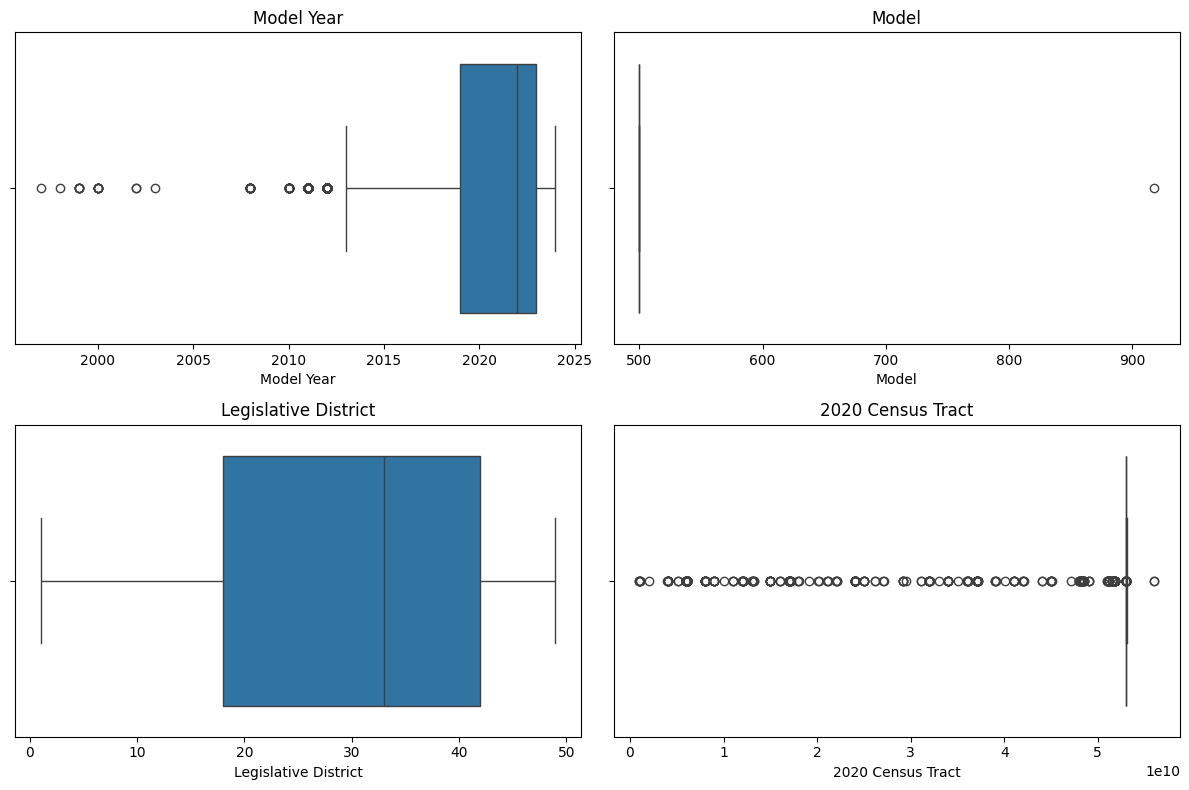

In [18]:
# Set up the figure size
plt.figure(figsize=(12, 8))

# Create box plots for each column using Seaborn
for i, col in enumerate(major_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(col)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show();

Model Year: Most vehicles are from recent years (2018–2024), but there are several older outliers, some dating back to the late 1990s.

Model: The distribution is highly skewed with one major outlier (around 900), suggesting a data anomaly or rare model code.

Legislative District: Fairly uniform distribution across districts, indicating wide geographic coverage.

2020 Census Tract: Data is spread across a wide range of census tracts with numerous outliers, suggesting significant geographic diversity or a few tracts with disproportionately high values.

Overall, the data spans a broad range of locations and years, but a few extreme values (outliers) may need closer examination or cleaning.

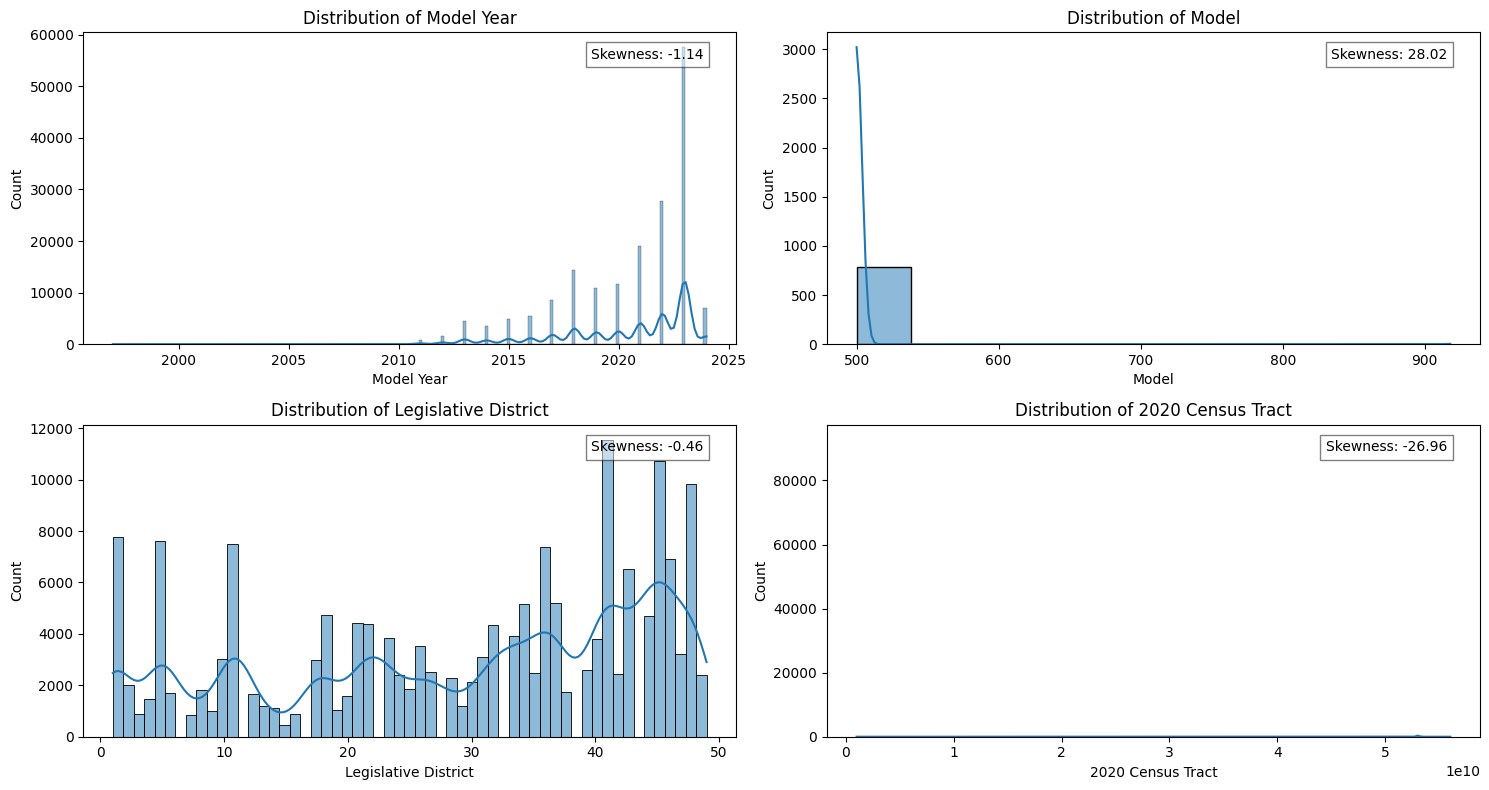

In [19]:
def plot_distributions(df, columns, n_cols=2, figsize=(15, 4)):
    n_rows = (len(columns) - 1) // n_cols + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1] * n_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

    for i, column in enumerate(columns):
        ax = axes[i]
        sns.histplot(df[column], kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

        # Add skewness value to the plot
        skewness = df[column].skew()
        ax.text(0.95, 0.95, f'Skewness: {skewness:.2f}', 
                horizontalalignment='right', verticalalignment='top', 
                transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
# Usage
columns_to_plot = ['Model Year', 'Model', 'Legislative District', '2020 Census Tract']
plot_distributions(df, columns_to_plot);

Model Year

Highly left-skewed (Skewness: -1.14), indicating most vehicles are newer (post-2015), with very few older models.

Strong spike in 2023–2024 suggests recent data entries dominate.

Model

Extremely right-skewed (Skewness: 28.02), indicating the presence of one or a few unusually high model codes.

Most model values are tightly clustered at the low end, with rare outliers far to the right.

Legislative District

Slight left skew (Skewness: -0.46), suggesting moderate balance across districts.

Some districts are significantly overrepresented (e.g., districts in the 40s).

2020 Census Tract

Extremely left-skewed (Skewness: -26.96), indicating data is densely concentrated at higher census tract values.

Many tracts have very low representation.

Summary Insight: The dataset is dominated by recent model years and has extreme skewness in both model and census tract values. These skews suggest potential data anomalies or the need for normalization before modeling or analysis.

## Removing Outliers

In [20]:
def handle_outliers(df, columns, method='iqr', threshold=1.5):
    df_cleaned = df.copy()
    
    for column in columns:
        if method == 'iqr':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            df_cleaned[column] = df_cleaned[column].clip(lower_bound, upper_bound)
        
        elif method == 'percentile':
            lower_bound = df[column].quantile(0.01)
            upper_bound = df[column].quantile(0.99)
            df_cleaned[column] = df_cleaned[column].clip(lower_bound, upper_bound)
    
    return df_cleaned

# EXPLORATORY DATA ANALYSIS (EDA)